In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

import nibabel as nib

In [2]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
fly = "fly_094"
directory = os.path.join(dataset_path,fly,'func_0')
warp_directory = os.path.join(dataset_path,fly,'warp')

res_anat = (0.65, 0.65, 1)
res_func = (2.6, 2.6, 5)

# Load raw-ish data brain

In [13]:
brain_file = os.path.join(directory, 'imaging', 'functional_channel_1.nii')
brain = np.array(nib.load(brain_file).get_data(), copy=True)

In [11]:
brain.shape

(256, 128, 49, 3384)

In [14]:
save_file = os.path.join(directory, 'imaging', 'temp_functional_channel_1_slice.nii')
nib.Nifti1Image(brain[:,:,:,:10], np.eye(4)).to_filename(save_file)

# Load meanbrain atlas

In [126]:
fixed_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/luke.nii"
fixed = np.asarray(nib.load(fixed_path).get_data().squeeze(), dtype='float32')
fixed = ants.from_numpy(fixed)
fixed.set_spacing(res_anat)
fixed_lowres = ants.resample_image(fixed,(256,128,49),1,0)

# Load Transforms

In [121]:
affine_file = os.listdir(os.path.join(warp_directory, 'func-to-anat_fwdtransforms_lowres'))[0]
affine_path = os.path.join(warp_directory, 'func-to-anat_fwdtransforms_lowres', affine_file)

syn_files = os.listdir(os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_lowres'))
syn_linear_path = os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_lowres', [x for x in syn_files if '.mat' in x][0])
syn_nonlinear_path = os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_lowres', [x for x in syn_files if '.nii.gz' in x][0])

transforms = [affine_path, syn_linear_path, syn_nonlinear_path]

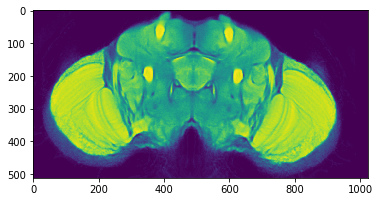

In [124]:
plt.imshow(fixed[:,:,100].T)

# Grab single volume

In [138]:
moving = ants.from_numpy(brain[:,:,:,:100])
moving.set_spacing((2.6, 2.6, 5, 1))

In [139]:
########################
### Apply Transforms ###
########################
t0 = time.time()
moco = ants.apply_transforms(fixed_lowres, moving, transforms, imagetype=3)
print(time.time()-t0)

9.11478567123413


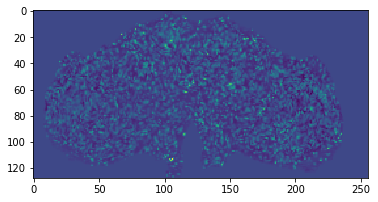

In [142]:
plt.imshow(moco[:,:,20,99].T)

In [143]:
save_file = os.path.join(directory,'temp_warp_test.nii')
nib.Nifti1Image(moco.numpy(), np.eye(4)).to_filename(save_file)

In [64]:
# I think I need to re-warp to get the low-resolution warp files.

In [ ]:
# Load meanbrain and downsample

In [ ]:
# Load anatomy scan and downsample

In [ ]:
# At end, sanity check that the mean of the re-aligned raw data looks good

In [73]:
temp = np.asarray(nib.load(transforms[2]).get_data().squeeze(), dtype='float32')
temp = ants.from_numpy(temp)

In [79]:
moving

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 128, 49, 2)
	 Spacing    : (2.6, 2.6, 5.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]

In [80]:
fixed_small = ants.resample_image(fixed,(256,128,49),1,0)

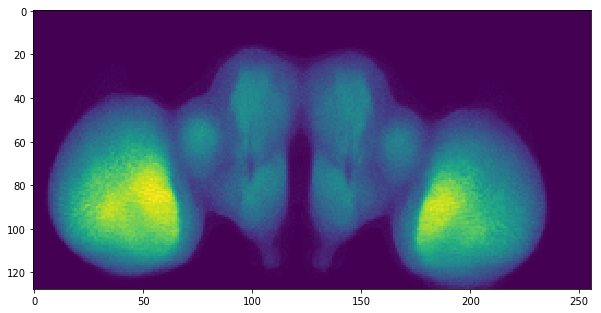

In [103]:
plt.figure(figsize=(10,10))
plt.imshow(fixed_small[:,:,40].T)

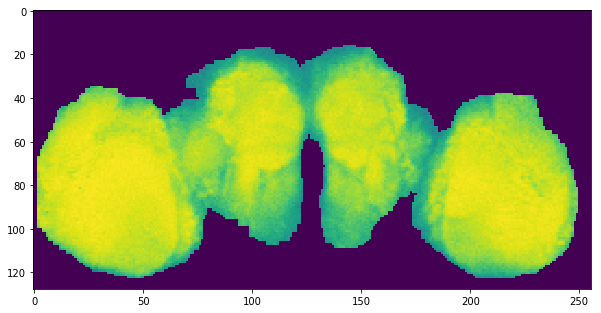

In [102]:
plt.figure(figsize=(10,10))
plt.imshow(np.mean(np.abs(brain[:,:,40,:]),axis=-1).T)

In [85]:
fixed_small

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 128, 49)
	 Spacing    : (2.6076, 2.6154, 5.3125)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [104]:
49*5

245

In [88]:
256/49

5.224489795918367

In [105]:
fixed

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (1024, 512, 256)
	 Spacing    : (0.65, 0.65, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [116]:
anat2mean = os.path.join(warp_directory, 'func-to-anat.nii')
anat2mean = np.asarray(nib.load(anat2mean).get_data().squeeze(), dtype='float32')
anat2mean = ants.from_numpy(anat2mean)

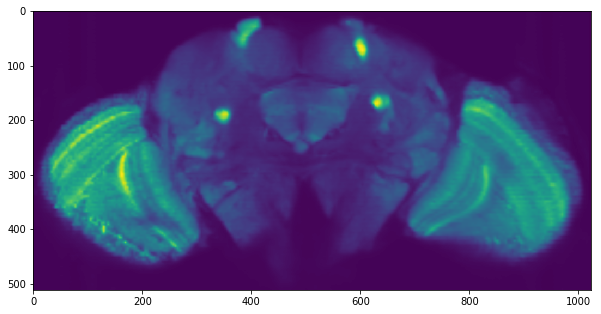

In [117]:
plt.figure(figsize=(10,10))
plt.imshow(anat2mean[:,:,100].T)

In [119]:
anat2mean_low = os.path.join(warp_directory, 'func-to-anat_lowres.nii')
anat2mean_low = np.asarray(nib.load(anat2mean_low).get_data().squeeze(), dtype='float32')
anat2mean_low = ants.from_numpy(anat2mean_low)

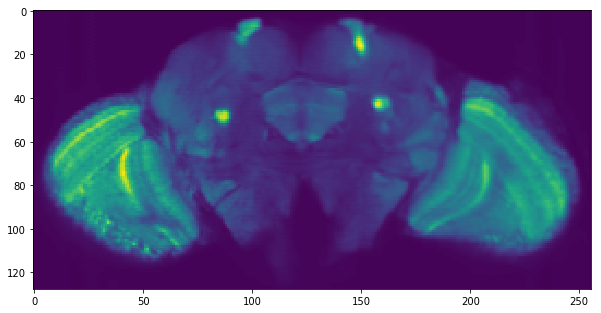

In [120]:
plt.figure(figsize=(10,10))
plt.imshow(anat2mean_low[:,:,19].T)